In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/Boston.csv


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import copy 

In [0]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/Boston.csv')

In [0]:
data.shape

(506, 14)

In [0]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [0]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### Observation:
### --> Most of them have a correlation of around +-0.5 with the target variable

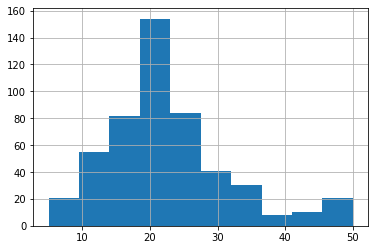

In [0]:
data['medv'].hist()

In [0]:
((data['medv']>=(data['medv'].mean() - 3 * data['medv'].std())) \
                          & (data['medv']<=(data['medv'].mean() + 3 * data['medv'].std()))).sum()

506

In [0]:
X = data.drop('medv',axis = 1)
y = data['medv']

# Check multicollinearity

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [0]:
X_drop_1 = X.drop(['nox','rm','tax','ptratio','age','black'],axis = 1)

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif["features"] = X_drop_1.columns

vif

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


### --> Multi-collinearity is required from statistical point of view but not from accuracy point of view.
### --> We will ignore handling multi-collinearity for now


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, test_size = 0.3)

In [0]:
X_train.shape

(354, 13)

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [0]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              636.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   4.75e-230
Time:                        05:58:09   Log-Likelihood:                         -1062.7
No. Observations:                 354   AIC:                                      2151.
Df Residuals:                     341   BIC:                                      2202.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1298      0.037     -3.471      0.001      -0.203      -0.056
zn             0.0479      0.018      2.696      0.007       0.013       0.083
indus         -0.0647      0.078     -0.828      0.408      -0.218       0.089
chas           3.9233      1.062      3.693      0.000       1.834       6.013
nox           -0.2740      3.927     -0.070      0.944      -7.999       7.451
rm             5.4133      0.372     14.563      0.000       4.682       6.145
age            0.0015      0.017      0.088      0.930      -0.031       0.034
dis           -0.8123      0.225     -3.618      0.000      -1.254      -0.371
rad            0.1847      0.078      2.367      0.019       0.031       0.338
tax           -0.0057      0.005     -1.220      0.223      -0.015       0.003
ptratio       -0.3981      0.134     -2.969      0.003      -0.662      -0.134
black          0.0173      0.003      5.349      0.000       0.011       0.024
lstat         -0.4865      0.062     -7.878      0.000      -0.608      -0.365
==============================================================================
Omnibus:                      142.244   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.640
Skew:                           1.606   Prob(JB):                    8.33e-170
Kurtosis:                       9.517   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

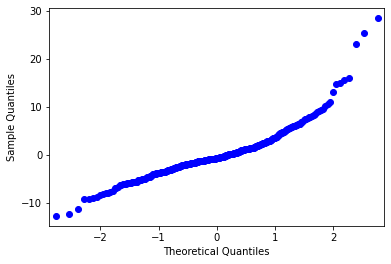

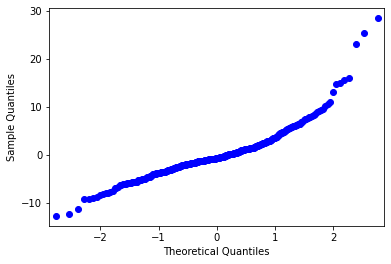

In [0]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

### --> Normality of errors is also required from statistical inference point of view

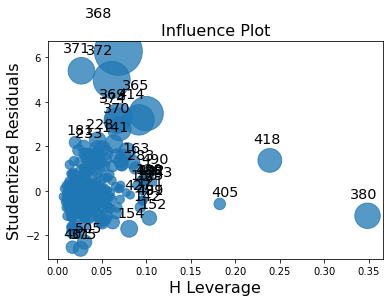

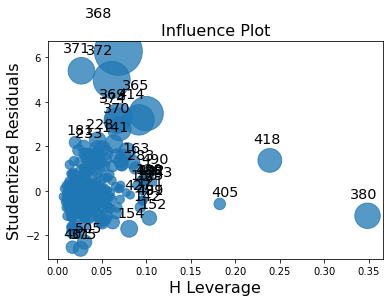

In [0]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

### --> There are quite a few influence points

# Influence points based on outlier criteria

In [0]:
regr.outlier_test()

,student_resid,unadj_p,bonf(p)
359,0.033368,0.973400,1.000000
374,3.155229,0.001747,0.618404
98,1.618956,0.106384,1.000000
273,-0.552729,0.580812,1.000000
329,-0.334445,0.738250,1.000000
...,...,...,...
440,-0.815449,0.415386,1.000000
131,-0.392208,0.695150,1.000000
249,0.041243,0.967127,1.000000
152,-1.223930,0.221826,1.000000


In [0]:
(regr.outlier_test()['student_resid'] > 3).sum()

7

In [0]:
(regr.outlier_test()['student_resid'] < -3).sum()

0

In [0]:
outlier_upp = regr.outlier_test()['student_resid'] > 3

In [0]:
outlier_low = regr.outlier_test()['student_resid'] < -3

In [0]:
outlier = np.logical_or(outlier_low, outlier_upp)

# Influence points based on Leverage Statistic

In [0]:
infl = regr.get_influence()
infl

In [0]:
leviers = infl.hat_matrix_diag #leverage
leviers[:10]

array([0.02900116, 0.0668746 , 0.03593382, 0.05134291, 0.05648497,
       0.02588316, 0.07417012, 0.02763276, 0.06873466, 0.0158589 ])

In [0]:
high_lev = leviers>0.08

In [0]:
influ_pts = np.logical_or(outlier, high_lev)

In [0]:
influ_index = X_train.index[influ_pts]

In [0]:
X_train = X_train.drop(influ_index)

In [0]:
y_train = y_train.drop(influ_index)

In [0]:
y_train.head()

359    22.6
98     43.8
273    35.2
329    22.6
170    17.4
Name: medv, dtype: float64

# ((((((

In [0]:
# import statsmodels.api as sm

# from statsmodels.gam.api import GLMGam, BSplines

# # import data
# # from statsmodels.gam.tests.test_penalized import df_autos

In [0]:
# house_train = pd.concat([X_train,y_train],axis = 1)

In [0]:
# house_train.head()

In [0]:
# house_train.shape

In [0]:
# house_train.columns

In [0]:
# # create spline basis for weight and hp
# x_spline = copy.deepcopy(X_train)

# # bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])
# bs = BSplines(x_spline, df=[4,4,4,10,4,4,4,4,4,4,4,4,4], degree=[3,3,3,3,3,3,3,3,3,3,3,3,3])

# # penalization weight
# # alpha = np.array([21833888.8, 6460.38479])

# gam_bs = GLMGam.from_formula('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', data=house_train,\
#                            smoother=bs)#, alpha=alpha)

# res_bs = gam_bs.fit()

# print(res_bs.summary())

In [0]:
# res_bs.plot_partial(0, cpr=True)

In [0]:
# res_bs.plot_partial(1, cpr=True)

In [0]:
# res_bs.plot_partial(3, cpr=True)

# ))))))))

# Build Smoothing Splines

In [0]:
pip install pygam

     |████████████████████████████████| 1.8 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 45 kB/s s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [0]:
# from pygam import GAM, s, f

In [0]:
# gam = GAM(s(0, n_splines=5) + s(1) + f(2) + s(3), distribution=’gamma’, link=’log’)

In [0]:
# from pygam import PoissonGAM
# gam = PoissonGAM(s(0, n_splines=5) + s(1) + f(2) + s(3))

In [0]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43


In [0]:
X_train.shape

(327, 13)

# GAM

In [0]:
from pygam import LinearGAM, s, f

In [0]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43


In [0]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12))

In [0]:
gam.fit(X_train,y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
   tol=0.0001, verbose=False)

In [0]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.3129
Link Function:                     IdentityLink Log Likelihood:                                   -899.461
Number of Samples:                          327 AIC:                                             1991.5478
                                                AICc:                                            2073.1588
                                                GCV:                                               11.8889
                                                Scale:                                              5.8794
                                                Pseudo R-Squared:                                   0.9437
Feature Function                  Lam

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [0]:
((gam.predict(X_test) - y_test) ** 2).mean()

13.035846554344733

<Figure size 432x288 with 0 Axes>

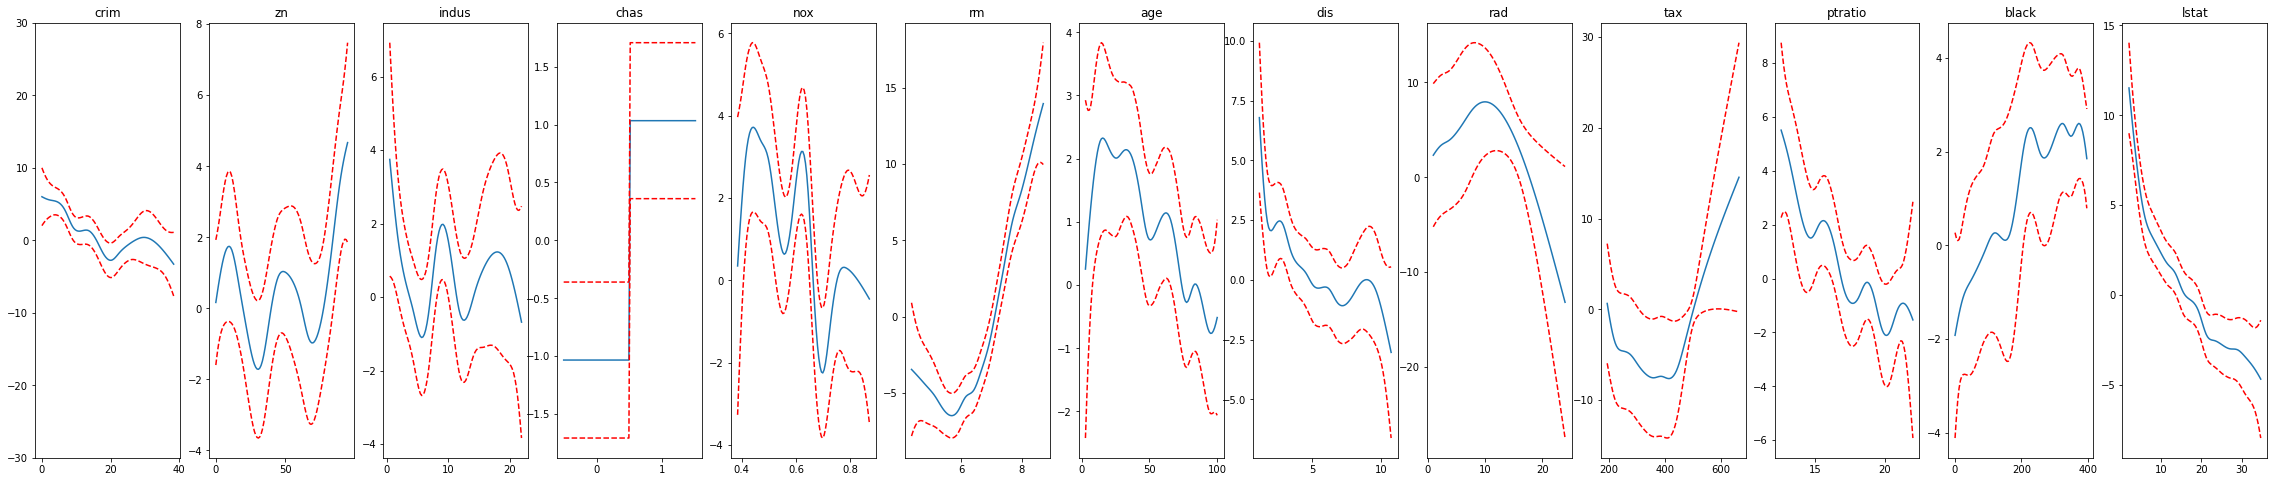

In [0]:
titles = X_train.columns
plt.figure()
fig, axs = plt.subplots(1,13,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

# Grid Search for lambda

In [0]:
# lams = np.random.rand(100, 13)
# lams = lams * 13 - 3
# lams = np.exp(lams)
# print(lams.shape)

In [0]:
# np.logspace(-3,3,11)

In [0]:
lams = np.array([np.random.choice([0],13),np.random.choice([5],13),np.random.choice([10],13),np.random.choice([15],13),np.random.choice([20],13),np.random.choice([25],13),\
               np.random.choice([30],13),np.random.choice([35],13),np.random.choice([40],13),np.random.choice([45],13),np.random.choice([50],13),np.random.choice([55],13)\
                ,np.random.choice([60],13),np.random.choice([65],13)])

In [0]:
lams

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
       [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35],
       [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40],
       [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45],
       [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55],
       [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
       [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]])

In [0]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12))\
.gridsearch(X_train.values, y_train.values, lam=lams, return_scores = True)

100% (14 of 14) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [0]:
gam

OrderedDict([(LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False),
              44.60680923317566),
             (LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False),
              10.302936435463629),
             (LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False),
              10.048412993235134),
           

In [0]:
# gam.summary()

AttributeError: 'collections.OrderedDict' object has no attribute 'summary'

In [0]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12), lam = 65)
gam.fit(X_train,y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
   tol=0.0001, verbose=False)

In [0]:
gam.summary()

In [0]:
((gam.predict(X_test) - y_test) ** 2).mean()

In [0]:
titles = X_train.columns
plt.figure()
fig, axs = plt.subplots(1,13,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])